In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset

In [2]:
meal = []
import os
path = "/Users/shreyaananth/Desktop/College/CIP/Code/Data/563/Train/Date"
for file in os.listdir(path):
    if file==".DS_Store":
        continue
    full_path = os.path.join(path,file)
    df = pd.read_csv(full_path, index_col=0)
    df.drop(columns='date',inplace=True)
    df.drop(columns='time',inplace=True)
    df.drop(columns='meal_type',inplace=True)
        
    for i in range(len(df)):
        if df.iloc[i,3]!=0:
            temp = []
            j = i
            while True:
                if j+1==len(df) or df.iloc[j,1]!=0 or df.iloc[j,2]!=0 or df.iloc[j,4]!=0:
                    break
                temp.append(df.iloc[j+1,0]-df.iloc[j,0])
                j = j+1
            if len(temp)>5 and len(temp)<=30:
                meal.append(temp)

In [3]:
X = to_time_series_dataset(meal)
model = TimeSeriesKMeans(n_clusters=2, metric="dtw", max_iter=10, random_state=42)
labels = model.fit_predict(X)

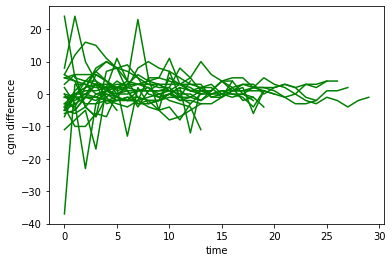

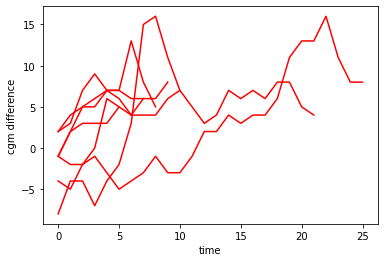

In [4]:
fig, one = plt.subplots()
one.set_xlabel("time")
one.set_ylabel("cgm difference")

fig, two = plt.subplots()
two.set_xlabel("time")
two.set_ylabel("cgm difference")

for i in range(len(meal)):
    time = list(range(len(meal[i])))
    if labels[i]==1:
        two.plot(time, meal[i], color = "red")
    else:
        one.plot(time, meal[i], color = "green")